In [1]:
import pandas as pd
import numpy as np
import random
import itertools
import math
import matplotlib.pyplot as plt

In [2]:
#path = 'C:/Users/Lyncoln/OneDrive/pos_UFRJ/mcmc/projeto_2/Trabalho-Metaheuristica-master/Instancias/toy.in'
#path = 'C:/Users/Lyncoln/OneDrive/pos_UFRJ/mcmc/projeto_2/Trabalho-Metaheuristica-master/Instancias/960/Geo_n960_ss_01.in'
#path = 'C:/Users/Lyncoln/OneDrive/pos_UFRJ/mcmc/projeto_2/Trabalho-Metaheuristica-master/Instancias/toy2.in'
#path = os.getcwd() + '/mdgplib/Geo/Geo_n030_ss_07.txt'
path = os.getcwd() + '\\nomes_pesc_md_2020_formated.txt'
#path = 'G:\GitHub\projeto_mcmc\Diversidade entre grupos/mdgplib/Geo/Geo_n120_ss_06.txt'

In [3]:
def read_objects(file):
    aux = True
    data = []
    for line in open(file,'r'):
        if(aux):
            aux = False
            first_line = list(map(lambda x: float(x), (line.replace(' \n',"").split(" ")[0:2])))
        else:
            data.append(list(map(lambda x: float(x), ((line.replace('\n','').split(' '))))))
            
    return(first_line, data)

In [4]:
first_line, data = read_objects(path)

In [5]:
n = first_line[0]
g = first_line[1]

In [6]:
def cost_matrix(dados,n):
    n = int(n)
    matrix = np.zeros((n,n))
    for index in data:
        i = int(index[0])
        j = int(index[1])
        matrix[i][j] = index[2]
        matrix[j][i] = index[2]
    
    return(matrix)

In [7]:
matrix = cost_matrix(data, n)

In [8]:
def initial_state(n,g):
    qtd_ind = int(n/g)
    state = []
    cont = 0
    
    for j in range(int(g)):
        for i in range(qtd_ind):
            state.append(j)
    #random.shuffle(state)            
    return(state)

In [9]:
def evaluete_group(cost, state):
    groups = list(set(state))
    sums = 0
    for i in groups:
        for j in np.where(np.array(state) == i):
            for element in list(itertools.combinations(j,2)):
                sums += cost[element[0]][element[1]]
            
    return(sums)

In [10]:
def generate_neighbors(state):
    state = list(state)
    groups = list(set(state))
    groups_change = random.sample(groups,2)
    
    index_choose = []
    for i in groups_change:
        index_choose.append(np.random.choice(np.where(np.array(state) == i)[0],1)[0])
    
    aux = state[index_choose[0]]
    state[index_choose[0]] = state[index_choose[1]]
    state[index_choose[1]] = aux
    
    return(state)
    

In [11]:
def boltzmann(state,cost,candidate_state,T):
    f_state = evaluete_group(cost,state)
    f_candidate = evaluete_group(cost,candidate_state)
    dif = math.exp(-abs(f_state - f_candidate)/T)
    return(dif)

def accept(state,candidate,cost,T,best):
    state_cost = evaluete_group(cost,state)
    candidate_cost = evaluete_group(cost,candidate)
    best_coast = evaluete_group(cost,best)
    
    if(state_cost < candidate_cost):
        state = candidate
        if(best_coast < candidate_cost):
            best = candidate
    
    else: 
        #print(boltzmann(state,cost,candidate,T))
        if(random.uniform(0,1) < boltzmann(state,cost,candidate,T)):
            state = candidate
    
    return(state,best)

In [12]:
def simulated_annealing(alfa,cost,itermax,t0,initial, verbose = False):
    itercont = 0
    T = t0
    state = initial
    best = initial
    values = [evaluete_group(cost,state)]
    T_delta = [T]
    while(T > 0.0001):
        while(itercont < itermax):
            
            itercont += 1
            neighbor = generate_neighbors(state)
            
            state, best = accept(state,neighbor,cost,T,best)    
            #print(evaluete_group(cost,state))
        T = T*alfa
        values.append(evaluete_group(cost,best))
        T_delta.append(T)
        if(verbose):
            print(T)
        itercont = 0
    
    return(evaluete_group(cost,best),best,values,T_delta)   

In [13]:
state = initial_state(n,g)
sa = simulated_annealing(0.90,matrix,1000,100000,state,True)
sa

90000.0
81000.0
72900.0
65610.0
59049.0
53144.1
47829.69
43046.721000000005
38742.04890000001
34867.84401000001
31381.059609000007
28242.953648100007
25418.658283290006
22876.792454961007
20589.113209464907
18530.20188851842
16677.181699666577
15009.463529699919
13508.517176729927
12157.665459056934
10941.89891315124
9847.709021836117
8862.938119652506
7976.644307687256
7178.97987691853
6461.081889226677
5814.973700304009
5233.476330273608
4710.128697246248
4239.115827521623
3815.2042447694607
3433.6838202925146
3090.3154382632633
2781.283894436937
2503.155504993243
2252.839954493919
2027.555959044527
1824.8003631400743
1642.320326826067
1478.0882941434604
1330.2794647291144
1197.2515182562029
1077.5263664305826
969.7737297875243
872.7963568087719
785.5167211278947
706.9650490151053
636.2685441135948
572.6416897022353
515.3775207320118
463.83976865881067
417.45579179292963
375.71021261363666
338.139191352273
304.32527221704567
273.8927449953411
246.503470495807
221.8531234462263
199.66

(2419.0,
 [6,
  0,
  1,
  2,
  4,
  2,
  9,
  4,
  1,
  0,
  7,
  8,
  7,
  3,
  4,
  5,
  9,
  3,
  7,
  3,
  8,
  6,
  3,
  2,
  1,
  8,
  1,
  9,
  5,
  6,
  5,
  7,
  8,
  3,
  5,
  4,
  7,
  9,
  2,
  0,
  6,
  2,
  5,
  6,
  0,
  0,
  1,
  8,
  9,
  4],
 [2128.0,
  2307.0,
  2307.0,
  2307.0,
  2307.0,
  2310.0,
  2311.0,
  2311.0,
  2320.0,
  2320.0,
  2320.0,
  2320.0,
  2321.0,
  2321.0,
  2321.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2322.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,
  2330.0,


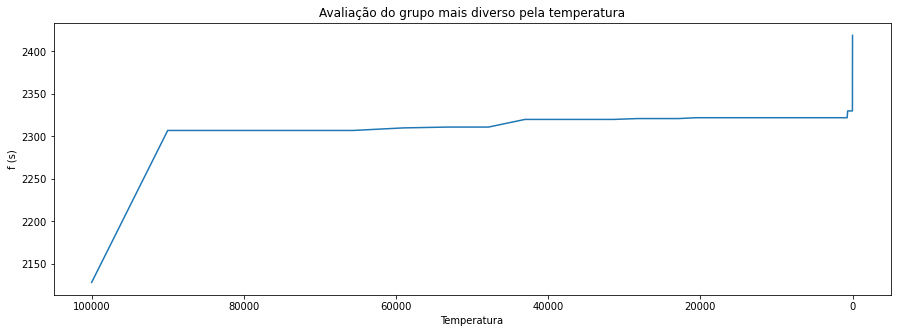

In [14]:
fig = plt.figure(figsize = (15,5))
ax = plt.axes()
x = sa[3]
y = sa[2]
ax.invert_xaxis()
plt.title('Avaliação do grupo mais diverso pela temperatura')
plt.ylabel('f (s)')
plt.xlabel('Temperatura')
ax.plot(x,y)

In [ ]:
# Salvar as listas dos alunos
with open("grupo_alunos.txt", "w") as output:
    output.write(str(sa[1]))

# Fazer as comparações com as bases na pasta compare

In [ ]:
import pandas as pd
import os

### Geo

In [ ]:
data_compare_geo = pd.read_excel('compare/geo.xlsx')

In [ ]:
values_sa = []
for archive in data_compare_geo.Data_Set:
    path = os.getcwd()+'/mdgplib/'+archive
    print(path)
    first_line, data = read_objects(path)
    n = first_line[0]
    g = first_line[1]
    cost = cost_matrix(data, n)
    state_initial = initial_state(n,g)
    sa_archive = simulated_annealing(0.90,cost,1000,100000,state_initial,True)
    values_sa.append(sa_archive[0])
    

In [ ]:
data_compare_geo["SA"] = values_sa

In [ ]:
data_compare_geo

In [ ]:
data_compare_geo.to_csv("compared/geo.csv")

### Ranint

In [ ]:
data_compare_ranint = pd.read_excel('compare/ranint.xlsx')

In [ ]:
values_sa = []
for archive in data_compare_ranint.Data_Set:
    path = os.getcwd()+'/mdgplib/'+archive
    print(path)
    first_line, data = read_objects(path)
    n = first_line[0]
    g = first_line[1]
    cost = cost_matrix(data, n)
    state_initial = initial_state(n,g)
    sa_archive = simulated_annealing(0.90,cost,1000,100000,state_initial,True)
    values_sa.append(sa_archive[0])

In [ ]:
data_compare_ranint["SA"] = values_sa

In [ ]:
data_compare_ranint

In [ ]:
data_compare_geo.to_csv("compared/ranint.csv")

### Ranreal

In [ ]:
data_compare_ranreal = pd.read_excel('compare/ranreal.xlsx')

In [ ]:
values_sa = []
for archive in data_compare_ranreal.Data_Set:
    path = os.getcwd()+'/mdgplib/'+archive
    print(path)
    first_line, data = read_objects(path)
    n = first_line[0]
    g = first_line[1]
    cost = cost_matrix(data, n)
    state_initial = initial_state(n,g)
    sa_archive = simulated_annealing(0.90,cost,1000,100000,state_initial,True)
    values_sa.append(sa_archive[0])

In [ ]:
data_compare_ranreal["SA"] = values_sa

In [ ]:
data_compare_ranreal

In [ ]:
data_compare_ranreal.to_csv("compared/ranreal.csv")